# Overlap CT and dose

We will use the Weighted dose definition used in the previous notebook. Once loaded the dose we'll use the CT created in the previous lecture.

In [5]:
def DW(Db,DN,Dn,Dg,BCONC,CBE,RBEN,RBEn):
    return (BCONC*CBE*Db) + (RBEN*DN) + (RBEn*Dn) + Dg

We know that CBE and RBE values are organ dependent, in this notebook we will calculate the dose as if it where all tumore. As in the previous notebook we start by loading the necessary python modules:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('/Users/postuma/WorkDir/pyMCSRT')
from pyMCSRT import read_phits_mesh as rpm 
import os

## Open all the results

as before we know the directory containing the PHITS results, and we know that the results are stored in: ```B-dose.out```, ```N-dose.out```, ```fast_n-dose.out```, ```photon-dose.out```.

With respect to the previous case we create a numpy array with 5 elements in the first dimension, the last one beeing the weighted dose value.

In [3]:
base_dir = "../PhitsSim/sim_results_10keV"
result_files = ["B-dose.out", "N-dose.out", "fast_n-dose.out", "photon-dose.out"]

data = np.zeros((5, 58, 43, 52))

for i in range(4):
    data[i]=rpm.read_phits_mesh(os.path.join(base_dir,result_files[i])).result[0,...,0]
    
result_files += ["weighted dose"]

{'neutron': 0}
{'neutron': 0}
{'neutron': 0}
{'photon': 0}


Now that the data is stored in a numpy array we can create the weighted dose by using the previously defined function with:

* $B_{conc}$ = 52.5
* $CBE_B$ = 3.5
* $RBE_N$ = 3.2
* $RBE_n$ = 3.2

In [4]:
data[4] = DW(data[0],
             data[1],
             data[2],
             data[3],
             52.5,
             3.5,
             3.2,
             3.2)

## Load CT image

we start by loading the image and recalling all the parameters we used to define the geometry.

In [6]:
import nibabel as nib
ct = nib.load("../DATA/LUNG-001/ct.nii.gz")

# bounding box
BB = np.array([[84,441],[134,404],[14,119]])
BB_shape = (357, 270, 105)

Having loaded the essential data, we can now resize the dose map to the ct image dimension.

In [9]:
from skimage.transform import resize
data_res = resize(data[4],
                  BB_shape,
                  mode='constant',
                  cval=0,
                  anti_aliasing=True,
                  preserve_range=True,
                  order=3)

Now that we have resized the image, it is possible to generate a Dose map of the size of the original CT.

In [11]:
WeightedDose = np.zeros(ct.shape)
WeightedDose[BB[0,0]:BB[0,1],BB[1,0]:BB[1,1],BB[2,0]:BB[2,1]] = data_res

We have all the tools to plot the dose over the image

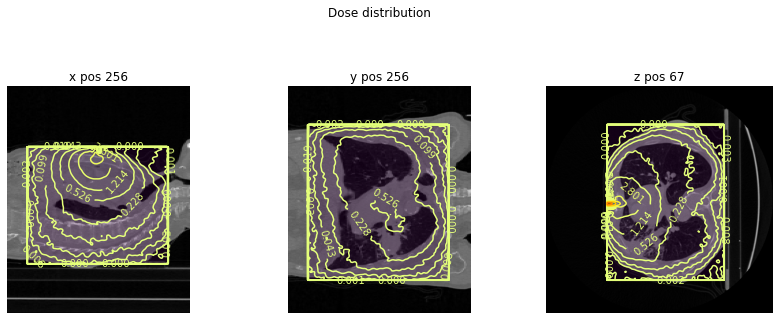

In [12]:
dose_plot = np.ma.masked_where(WeightedDose<=0,WeightedDose)

ct_img_data = ct.get_fdata()

x_dim, y_dim, z_dim = ct.header.get_zooms()
yz_corr = y_dim / z_dim
xz_corr = x_dim / z_dim
xy_corr = x_dim / y_dim

xm = ct.shape[0]//2
ym = ct.shape[1]//2
zm = ct.shape[2]//2

vmin = WeightedDose.min()
vmax = WeightedDose.max()
vmean= WeightedDose.mean()
vstd = WeightedDose.std()

levels = np.logspace(-5, 1.9, num=20)

fig, ax = plt.subplots(1,3,tight_layout=True,figsize=(12,4))

fig.suptitle("Dose distribution",y=1.1)

ax[0].set_title("x pos {}".format(xm))
ax[0].imshow(ct_img_data[xm,...], aspect=yz_corr,cmap="gray")
ax[0].imshow(dose_plot[xm,...],vmin=vmin,vmax=vmax, aspect=yz_corr,alpha=0.25)
ax[0].axis("off")
CS = ax[0].contour(WeightedDose[xm,...]/vmax*100,levels,cmap="Wistia")
ax[0].clabel(CS, inline=True, fontsize=10)

ax[1].set_title("y pos {}".format(ym))
ax[1].imshow(ct_img_data[:,ym,:], aspect=xz_corr,cmap="gray")
ax[1].imshow(dose_plot[:,ym,:],vmin=vmin,vmax=vmax, aspect=xz_corr,alpha=0.25)
ax[1].axis("off")
CS = ax[1].contour(WeightedDose[:,ym,:]/vmax*100,levels,cmap="Wistia")
ax[1].clabel(CS, inline=True, fontsize=10)

ax[2].set_title("z pos {}".format(zm))
ax[2].imshow(ct_img_data[...,zm], aspect=xy_corr,cmap="gray")
ax[2].imshow(dose_plot[...,zm],vmin=vmin,vmax=vmax, aspect=xy_corr,alpha=0.25)
ax[2].axis("off")
CS = ax[2].contour(WeightedDose[...,zm]/vmax*100,levels,cmap="Wistia")
ax[2].clabel(CS, inline=True, fontsize=10)

plt.show()
plt.close()

# Exercise 3 result

Try to plot all the dose components

In [13]:
data_res = resize(data,
                  (5,BB_shape[0],BB_shape[1],BB_shape[2]),
                  mode='constant',
                  cval=0,
                  anti_aliasing=True,
                  preserve_range=True,
                  order=3)

WeightedDose = np.zeros((5,ct.shape[0],ct.shape[1],ct.shape[2]))
WeightedDose[:,BB[0,0]:BB[0,1],BB[1,0]:BB[1,1],BB[2,0]:BB[2,1]] = data_res

Now we can plot

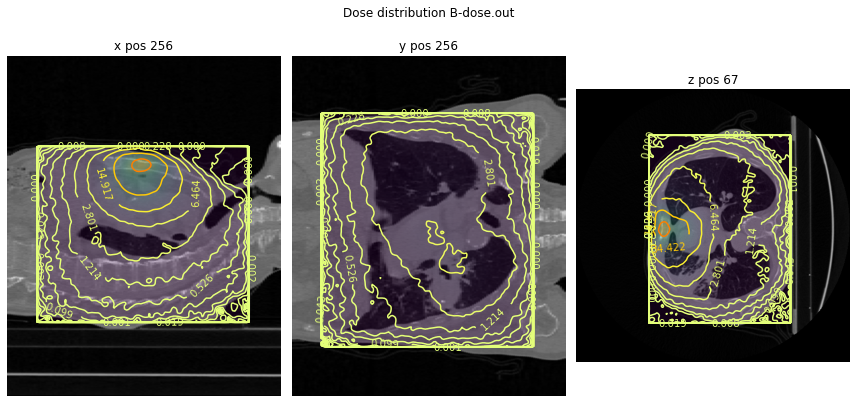

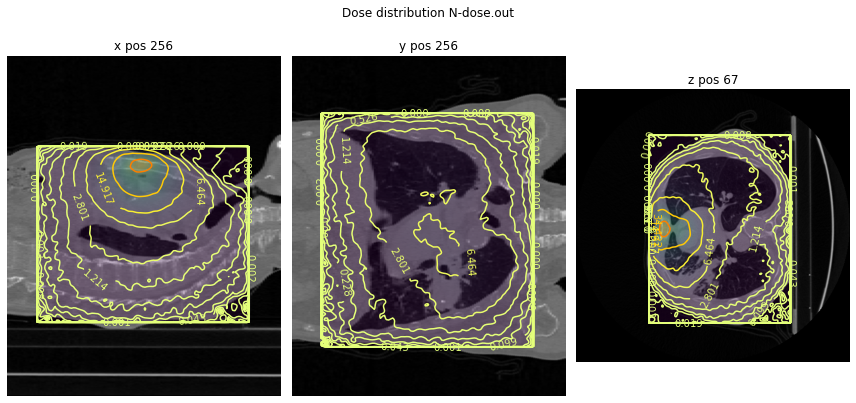

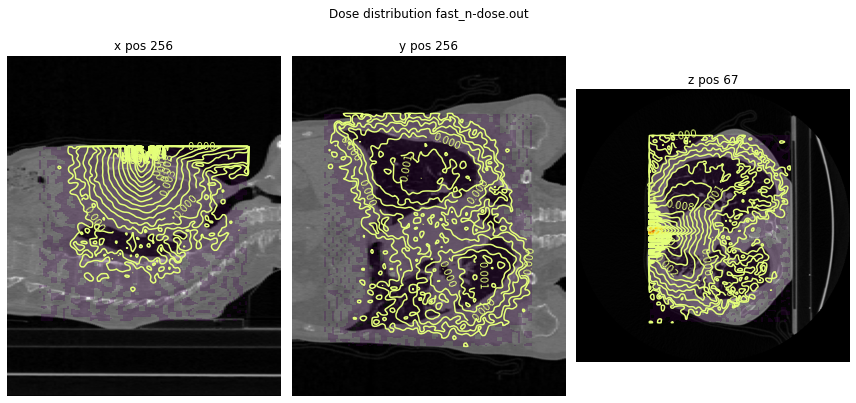

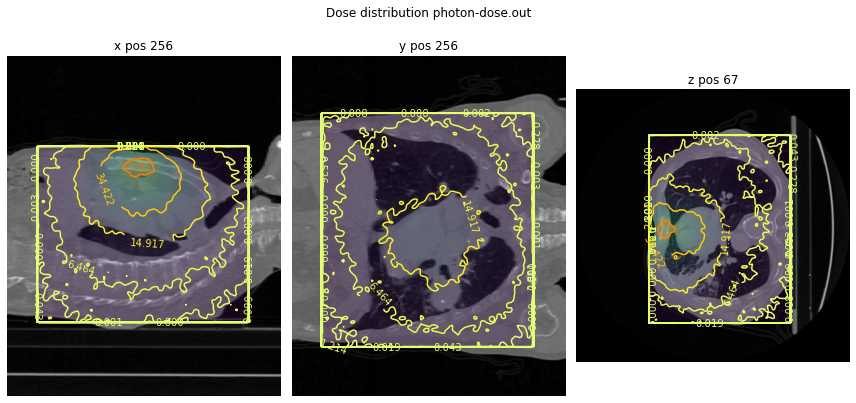

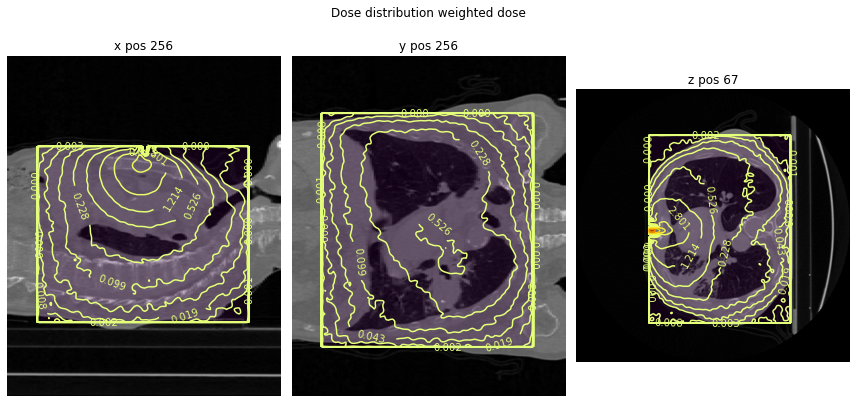

In [14]:
dose_plot = np.ma.masked_where(WeightedDose<=0,WeightedDose)

ct_img_data = ct.get_fdata()

x_dim, y_dim, z_dim = ct.header.get_zooms()
yz_corr = y_dim / z_dim
xz_corr = x_dim / z_dim
xy_corr = x_dim / y_dim

xm = ct.shape[0]//2
ym = ct.shape[1]//2
zm = ct.shape[2]//2

levels = np.logspace(-5, 1.9, num=20)

result_files += ["Weighted Dose"]

for i in range(5):
    
    vmin = WeightedDose[i].min()
    vmax = WeightedDose[i].max()
    vmean= WeightedDose[i].mean()
    vstd = WeightedDose[i].std()
    
    fig, ax = plt.subplots(1,3,tight_layout=True,figsize=(12,6),sharey=True)

    fig.suptitle("Dose distribution {}".format(result_files[i]))

    ax[0].set_title("x pos {}".format(xm))
    ax[0].imshow(ct_img_data[xm,...], aspect=yz_corr,cmap="gray")
    ax[0].imshow(dose_plot[i,xm,...],vmin=vmin,vmax=vmax, aspect=yz_corr,alpha=0.25)
    ax[0].axis("off")
    CS = ax[0].contour(WeightedDose[i,xm,...]/vmax*100,levels,cmap="Wistia")
    ax[0].clabel(CS, inline=True, fontsize=10)

    ax[1].set_title("y pos {}".format(ym))
    ax[1].imshow(ct_img_data[:,ym,:], aspect=xz_corr,cmap="gray")
    ax[1].imshow(dose_plot[i,:,ym,:],vmin=vmin,vmax=vmax, aspect=xz_corr,alpha=0.25)
    ax[1].axis("off")
    CS = ax[1].contour(WeightedDose[i,:,ym,:]/vmax*100,levels,cmap="Wistia")
    ax[1].clabel(CS, inline=True, fontsize=10)

    ax[2].set_title("z pos {}".format(zm))
    ax[2].imshow(ct_img_data[...,zm], aspect=xy_corr,cmap="gray")
    ax[2].imshow(dose_plot[i,...,zm],vmin=vmin,vmax=vmax, aspect=xy_corr,alpha=0.25)
    ax[2].axis("off")
    CS = ax[2].contour(WeightedDose[i,...,zm]/vmax*100,levels,cmap="Wistia")
    ax[2].clabel(CS, inline=True, fontsize=10)

    plt.show()
    plt.close()